根据知乎的解释（https://zhuanlan.zhihu.com/p/30424497）：
> 箱线图（Boxplot）也称箱须图（Box-whisker Plot），它是用一组数据中的最小值、第一四分位数、中位数、第三四分位数和最大值来反映数据分布的中心位置和散布范围，可以粗略地看出数据是否具有对称性。通过将多组数据的箱线图画在同一坐标上，则可以清晰地显示各组数据的分布差异，为发现问题、改进流程提供线索。

解释一下一些名词：将所有数据从小到大排序，第一个、第二个、第三个四分之一位置的数值分别是图中的第一四分位数（Q1）、中位数（median）、第三四分位数（Q3）。Q3 和 Q1 的差值称为 IQR。Q1-1.5IQR 和 Q3+1.5IQR 叫做须（wishker），两条须之外的值称为离群值（flier）。

```
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']

np.random.seed(1)
data = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))
data.shape

(100, 3)

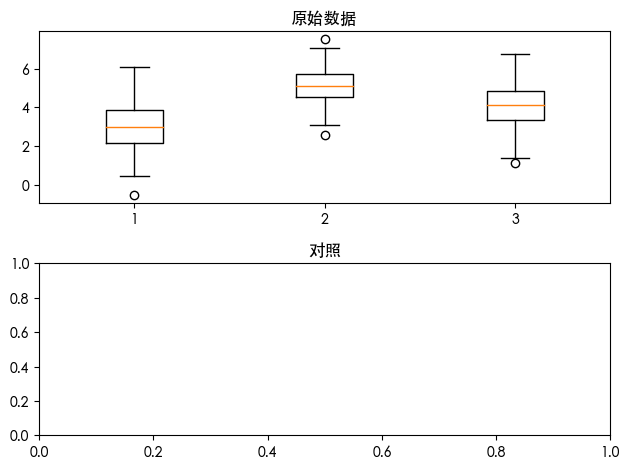

In [2]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('原始数据')

ax2.set_title('对照')

fig.tight_layout()
plt.show()

# 函数参数：
```python
boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, capwidths=None, *, data=None)
```

## `x`, `data`
数据源，不再赘述。

## `notch`
布尔值，默认为 `False`。缺口（notches）反映了中线附近的置信度。此参数设置为 `True` 将在箱型图上添加置信度缺口，设置为 `False` 将绘制矩形箱型图。

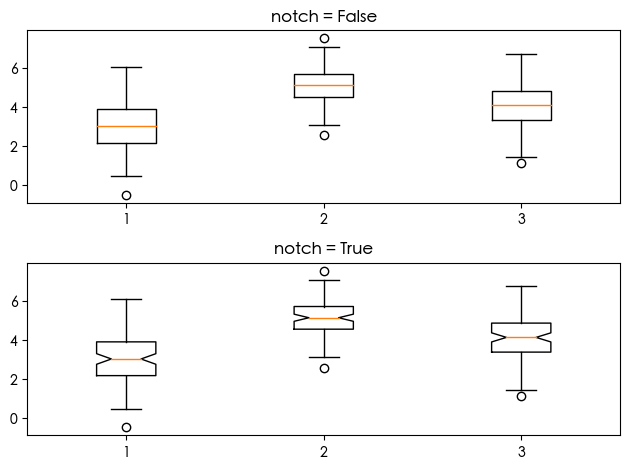

In [3]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('notch = False')

ax2.boxplot(x = data, notch=True)
ax2.set_title('notch = True')

fig.tight_layout()
plt.show()

## `sym`
离群点的标记，`''` 隐藏离群点，`None` 使用默认离群点 `'b+'`，默认值是 `None`。这里的值与折线图图里的 `fmt` 基本相同，但是不需要加线型。

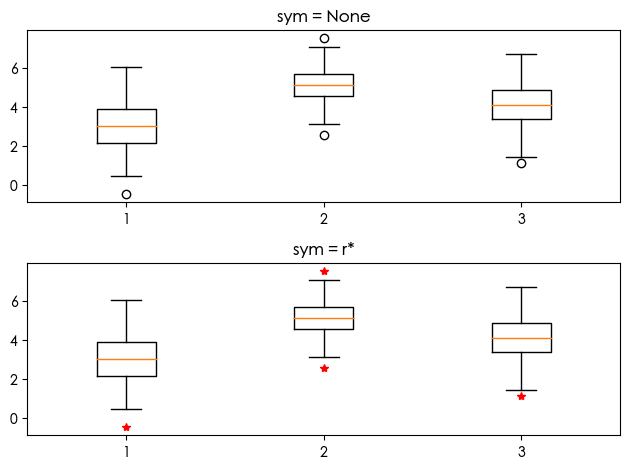

In [4]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('sym = None')

ax2.boxplot(x = data, sym='r*')
ax2.set_title('sym = r*')

fig.tight_layout()
plt.show()

## `vert`
布尔值，默认是 `True`。`True` 画竖直箱体，`False` 画水平箱体。

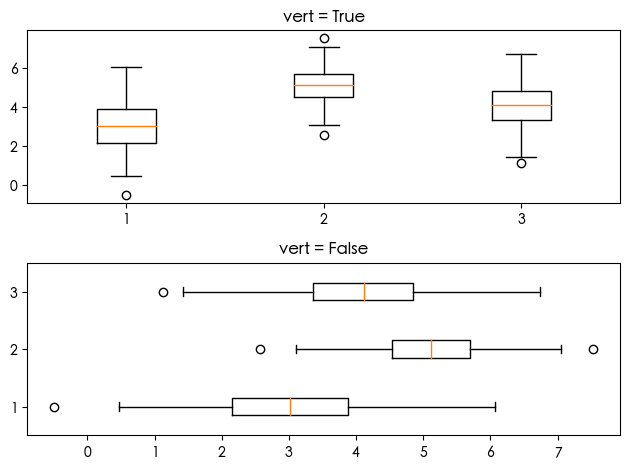

In [5]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('vert = True')

ax2.boxplot(x = data, vert = False)
ax2.set_title('vert = False')

fig.tight_layout()
plt.show()

## `whis`
浮点数或包含两个浮点数的元组，默认值是 1.5。
- 若是浮点数，低须值是大于 Q1-whis*(Q3-Q1) 的最小值，高须值是小于 Q3+whis*(Q3-Q1) 的最大值；
- 若是元组则表示高低须值的百分位数。

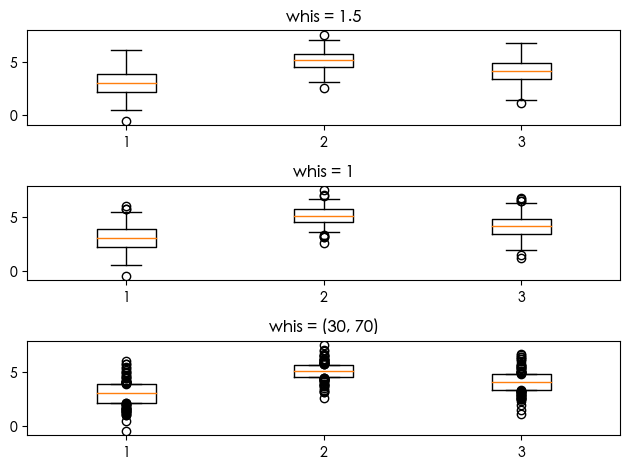

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.boxplot(x = data)
ax1.set_title('whis = 1.5')

ax2.boxplot(x = data, whis = 1)
ax2.set_title('whis = 1')

ax3.boxplot(x = data, whis = (30, 70))
ax3.set_title('whis = (30, 70)')

fig.tight_layout()
plt.show()

## `bootstrap`
是否使用 bootstrap 方法计算中位数的置信度，可使用正整数或 `None`，默认为 `None`。若为 `None`，则不使用 bootstrap，使用高斯法计算中位数的置信度；推荐数值设置为 1000~10000之间。（基本看不出区别）

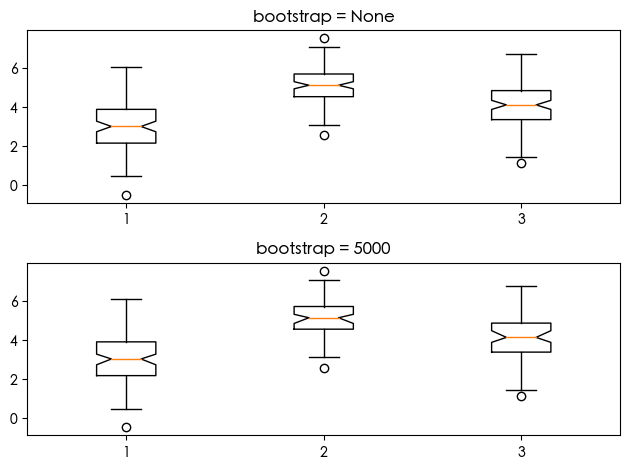

In [7]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data, notch = True)
ax1.set_title('bootstrap = None')

ax2.boxplot(x = data, notch = True, bootstrap = 5000)
ax2.set_title('bootstrap = 5000')

fig.tight_layout()
plt.show()

## `usermedians`
一个与数据等长的序列或 `None`，默认为 `None`。为每个数据集强制设定中位数；若为 `None`，则中位数由 matplotlib 计算。

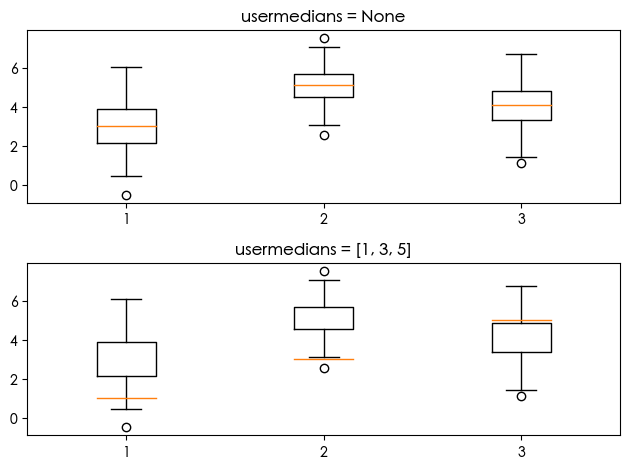

In [8]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('usermedians = None')

ax2.boxplot(x = data, usermedians = [1, 3, 5])
ax2.set_title('usermedians = [1, 3, 5]')

fig.tight_layout()
plt.show()

## `conf_intervals`
一个与数据等长的二元序列或 `None`，默认为 `None`。为每个数据集强制设定中位数置信度；若为 `None`，则中位数置信度由 matplotlib 计算。

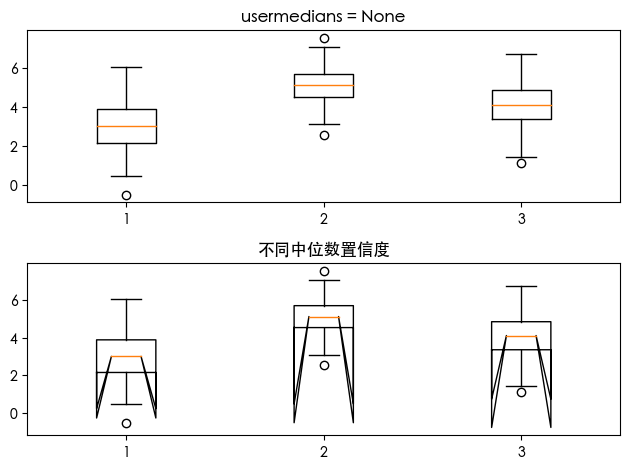

In [9]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('usermedians = None')

np.random.seed(1)
ax2.boxplot(x = data, notch = True, bootstrap = 5000,
            conf_intervals=[(-0.25, 0.25), (-0.5, 0.5), (-0.75, 0.75)])
ax2.set_title('不同中位数置信度')

fig.tight_layout()
plt.show()

## `positions`
箱体和标签的位置（坐标轴刻度）可以自动调整。默认值为 `range(1, N+1)`。

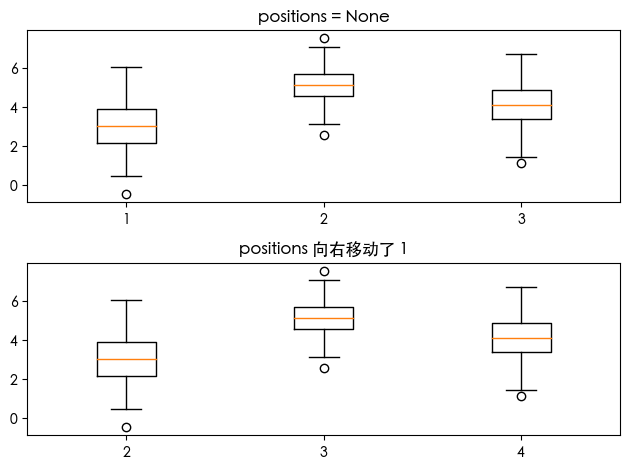

In [10]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('positions = None')

np.random.seed(1)
ax2.boxplot(x = data, positions=range(2, data.shape[1] + 2))
ax2.set_title('positions 向右移动了 1')

fig.tight_layout()
plt.show()

## `widths`
浮点数或与数据等长的浮点数序列，默认是 1.5 或 `0.15*(distance between extreme positions)` 的较小值。箱体的宽度。

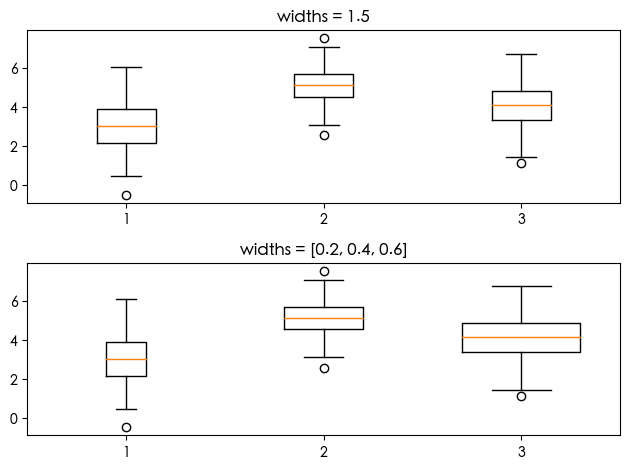

In [11]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('widths = 1.5')

np.random.seed(1)
ax2.boxplot(x = data, widths = [.2, .4, .6])
ax2.set_title('widths = [0.2, 0.4, 0.6]')

fig.tight_layout()
plt.show()

## `patch_artist`
布尔值，为 `False` 则使用 `matplotlib.lines.Line2D` 生成箱体（五填充），为 `True` 则使用 `matplotlib.patches.Patch` 生成箱体（有填充），默认为 `False`。

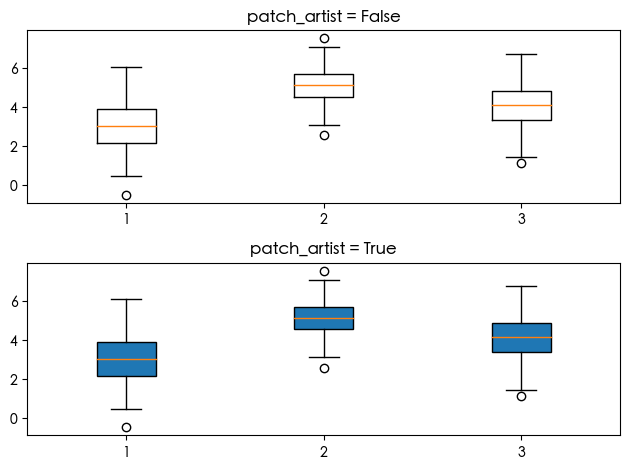

In [12]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('patch_artist = False')

np.random.seed(1)
ax2.boxplot(x = data, patch_artist = True)
ax2.set_title('patch_artist = True')

fig.tight_layout()
plt.show()

## `labels`
字符串序列，数据集的标签，在坐标轴上对应位置。

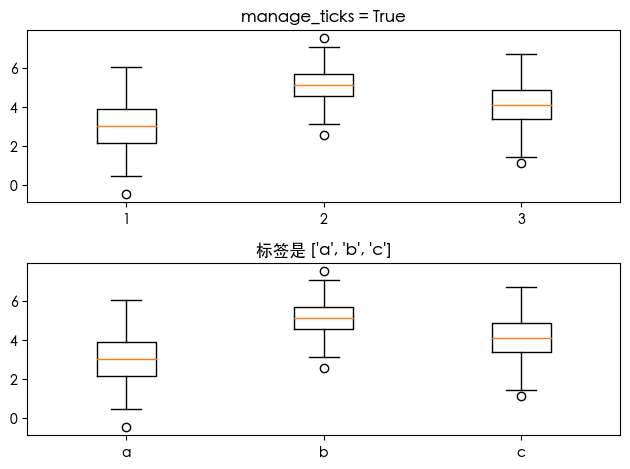

In [13]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('manage_ticks = True')

np.random.seed(1)
ax2.boxplot(x = data, labels = ['a', 'b', 'c'])
ax2.set_title("标签是 ['a', 'b', 'c']")

fig.tight_layout()
plt.show()

## `manage_ticks`
布尔值，默认为 `True`。若为 `True`，刻度和标签将自动根据箱体位置调节。

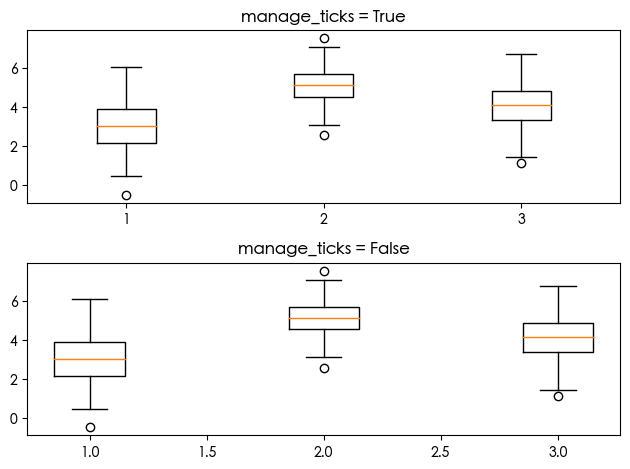

In [14]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('manage_ticks = True')

np.random.seed(1)
ax2.boxplot(x = data, manage_ticks = False)
ax2.set_title('manage_ticks = False')

fig.tight_layout()
plt.show()

## `autorange`
布尔值，默认为 `False`。当为 `True` 且 Q1 = Q3 时，`whis` 将设置为 (0, 100)，使须线的末端为数据集的最大值、最小值。

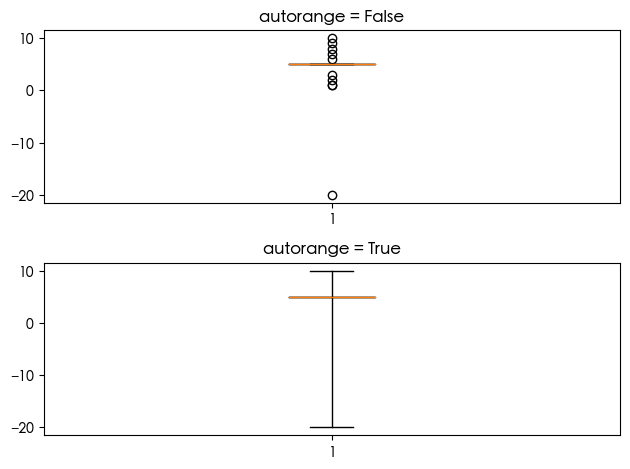

In [15]:
x = [-20, 1, 2, 3, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 8, 9, 10]

fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = x)
ax1.set_title('autorange = False')

np.random.seed(1)
ax2.boxplot(x = x, autorange = True)
ax2.set_title('autorange = True')

fig.tight_layout()
plt.show()

## `meanline`
布尔值，默认为 `False`。当为 `True` 时以一条直线显示数据的平均值。

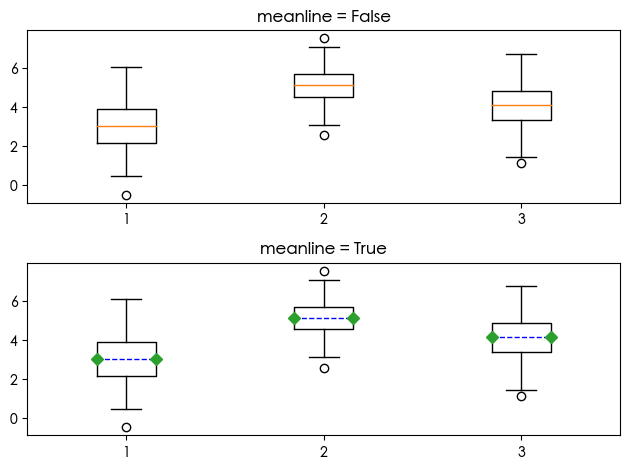

In [16]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('meanline = False')

np.random.seed(1)
ax2.boxplot(x = data, meanline = True, showmeans = True,
            meanprops={'color':'blue', 'linestyle':'--', 'marker':'D'},
            medianprops={'color':'red', 'linestyle':''})
ax2.set_title('meanline = True')

fig.tight_layout()
plt.show()

## `zorder`
浮点数，默认为 2.0。图形的先后顺序，数值越大越在表面。

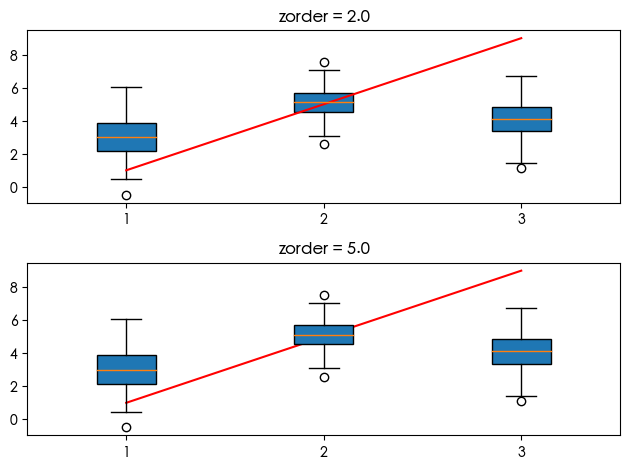

In [17]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data, patch_artist = True)
ax1.plot([1, 2, 3], [1, 5, 9], color = 'red')
ax1.set_title('zorder = 2.0')

ax2.plot([1, 2, 3], [1, 5, 9], color = 'red')
ax2.boxplot(x = data, patch_artist = True,
            zorder = 5.0)
ax2.set_title('zorder = 5.0')

fig.tight_layout()
plt.show()

# 其它参数
除了上面的参数外，还有 11 个参数：
## `showcaps`：
布尔值，默认为 True。是否显示须线。

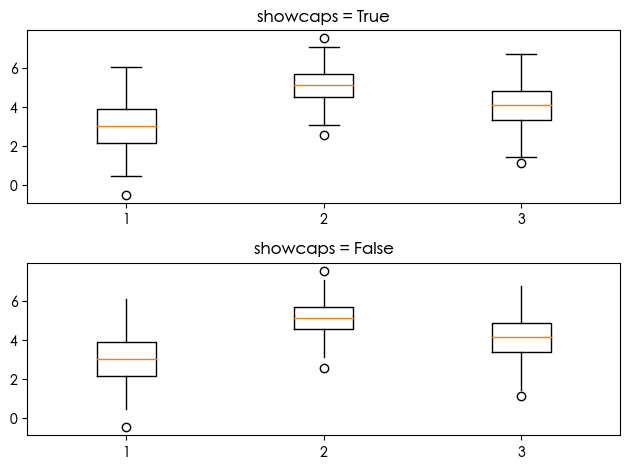

In [18]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('showcaps = True')

ax2.boxplot(x = data, showcaps = False)
ax2.set_title('showcaps = False')

fig.tight_layout()
plt.show()

## `showmeans`
布尔值，默认为 `False`。当为 `True` 时显示数据的平均值。

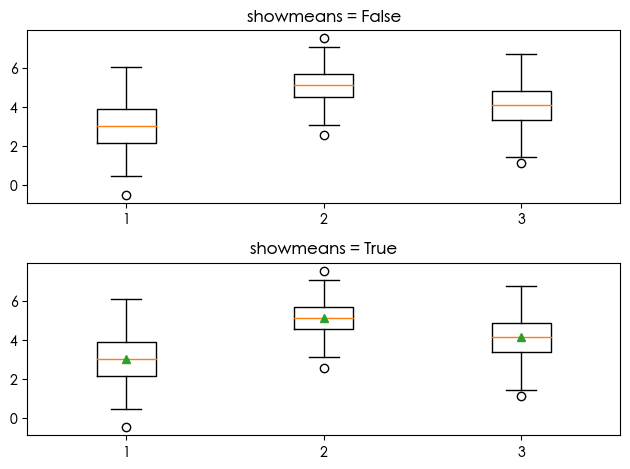

In [19]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('showmeans = False')

np.random.seed(1)
ax2.boxplot(x = data, showmeans = True)
ax2.set_title('showmeans = True')

fig.tight_layout()
plt.show()

## `showbox`：
布尔值，默认为 True。是否显示箱体。

## `showfliers`：
布尔值，默认为 True。是否显示离群值

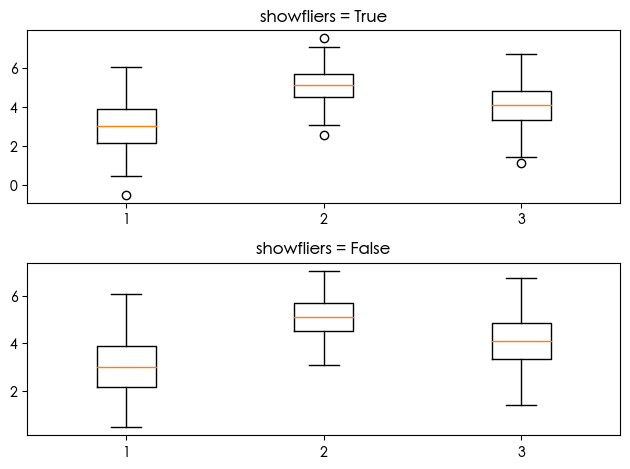

In [20]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.boxplot(x = data)
ax1.set_title('showfliers = True')

np.random.seed(1)
ax2.boxplot(x = data, showfliers = False)
ax2.set_title('showfliers = False')

fig.tight_layout()
plt.show()

还有一些控制图形各部分的参数：
- `capprops`
- `boxprops`
- `whiskerprops`
- `flierprops`
- `medianprops`
- `meanprops`

以及 `capwidths` 参数。上述参数接收字典，内部变量是 `matplotlib.lines.Line2D` 或 `matplotlib.collections.Collection` 参数。官方没有太多解释，时间有限，`暂时略过。